In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
import warnings
warnings.filterwarnings('ignore')
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

--2019-12-28 08:38:10--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  34.1MB/s    in 1.9s    

2019-12-28 08:38:13 (34.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



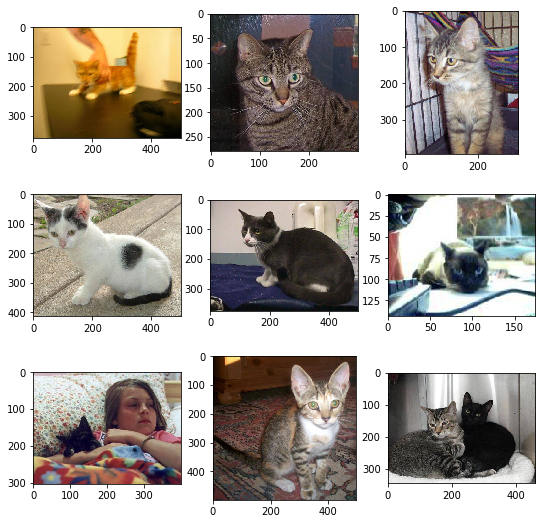

In [10]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
pyplot.figure(figsize=(9,9))
# define location of dataset
# plot few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = train_cats_dir + '/cat.'+ str(i) +'.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure

pyplot.show()

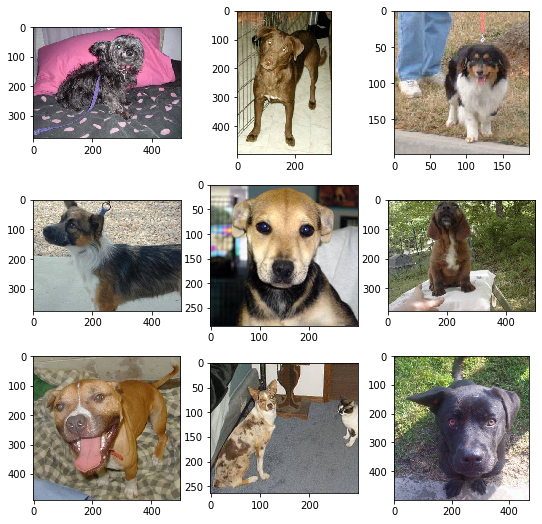

In [11]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
pyplot.figure(figsize=(9,9))
# define location of dataset
# plot few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = train_dogs_dir + '/dog.'+ str(i) +'.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure

pyplot.show()

##**VGG16**
![vgg16 architecture](https://user-images.githubusercontent.com/36665975/71507694-5fccd700-28ab-11ea-8667-e196b7f717b3.png)


553467904/553467096 [==============================] - 37s 0us/step


[[('n02123045', 'tabby', 0.5997719),
  ('n02124075', 'Egyptian_cat', 0.1412815),
  ('n02123159', 'tiger_cat', 0.1308038),
  ('n02127052', 'lynx', 0.05900412),
  ('n02123394', 'Persian_cat', 0.010853074)]]

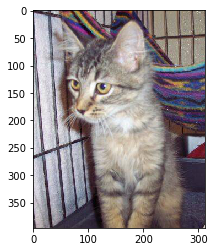

In [13]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
import numpy as np

from matplotlib import pyplot
from matplotlib.image import imread

model = VGG16(include_top=True,weights='imagenet')
img_path = train_cats_dir + '/cat.2.jpg'

cat = imread(img_path)
pyplot.imshow(cat)

img = image.load_img(img_path,target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
pred = model.predict(x)
decode_predictions(pred)

### **Train Test Split**

In [14]:
img_data_list=[]

for i in range(1000):
	img_path = train_cats_dir + '/cat.'+ str(i) +'.jpg'
	img = image.load_img(img_path, target_size=(224, 224))
	X_train = image.img_to_array(img)
	X_train = np.expand_dims(X_train, axis=0)
	X_train = preprocess_input(X_train)
	img_data_list.append(X_train)
 
for i in range(1000):
	img_path = train_dogs_dir + '/dog.'+ str(i) +'.jpg'
	img = image.load_img(img_path, target_size=(224, 224))
	X_train = image.img_to_array(img)
	X_train = np.expand_dims(X_train, axis=0)
	X_train = preprocess_input(X_train)
	img_data_list.append(X_train)

img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

# Define the number of classes
num_classes = 2
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:1000] = 0


names = ['cat','dog']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)
#Shuffle the dataset
X_train,y_train = shuffle(img_data,Y, random_state=2)


(2000, 1, 224, 224, 3)
(1, 2000, 224, 224, 3)
(2000, 224, 224, 3)


In [15]:

img_data_list1=[]

for i in range(2000,2500):
	img_path = validation_cats_dir + '/cat.'+ str(i) +'.jpg'
	img = image.load_img(img_path, target_size=(224, 224))
	X_test = image.img_to_array(img)
	X_test = np.expand_dims(X_test, axis=0)
	X_test = preprocess_input(X_test)
	img_data_list1.append(X_test)
 
for i in range(2000,2500):
	img_path = validation_dogs_dir + '/dog.'+ str(i) +'.jpg'
	img = image.load_img(img_path, target_size=(224, 224))
	X_test = image.img_to_array(img)
	X_test = np.expand_dims(X_test, axis=0)
	X_test = preprocess_input(X_test)
	img_data_list1.append(X_test)

img_data1 = np.array(img_data_list1)
#img_data = img_data.astype('float32')
print (img_data1.shape)
img_data1=np.rollaxis(img_data1,1,0)
print (img_data1.shape)
img_data1=img_data1[0]
print (img_data1.shape)

# Define the number of classes
num_classes = 2
num_of_samples = img_data1.shape[0]
labels1 = np.ones((num_of_samples,),dtype='int64')

labels1[0:500]=0

names = ['cat','dog']

# convert class labels to on-hot encoding
Y1 = np_utils.to_categorical(labels1, num_classes)
#Shuffle the dataset
X_test,y_test = shuffle(img_data1,Y1, random_state=2)

(1000, 1, 224, 224, 3)
(1, 1000, 224, 224, 3)
(1000, 224, 224, 3)


## **Freezing top layers of vgg16 and Adjusting last layer for our classification problem**

In [16]:
image_input = Input(shape=(224, 224, 3))
model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()
last_layer = model.get_layer('fc2').output
#x= Flatten(name='flatten')(last_layer)
out = Dense(2, activation='sigmoid', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

custom_vgg_model.layers[3].trainable

custom_vgg_model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### **Fitting our customized vgg16 model**

In [17]:
hist = custom_vgg_model.fit(X_train, y_train, batch_size=20, epochs=8, verbose=1, validation_data=(X_test, y_test))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2000 samples, validate on 1000 samples
Epoch 1/8
2000/2000 [==============================] - 12s 6ms/step - loss: 0.1150 - acc: 0.9625 - val_loss: 0.1236 - val_acc: 0.9590
Epoch 2/8
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0405 - acc: 0.9855 - val_loss: 0.0636 - val_acc: 0.9840
Epoch 3/8
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0159 - acc: 0.9930 - val_loss: 0.0582 - val_acc: 0.9820
Epoch 4/8
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0113 - acc: 0.9960 - val_loss: 0.0769 - val_acc: 0.9820
Epoch 5/8
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0029 - acc: 0.9985 - val_loss: 0.0698 - val_acc: 0.9830
Epoch 6/8
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0017 - acc: 0.9995 - val_loss: 0.0781 - val_acc: 0.9830
Epoch 7/8
2000/2000 [==============================]

### **Visualizing the accuracy and loss**

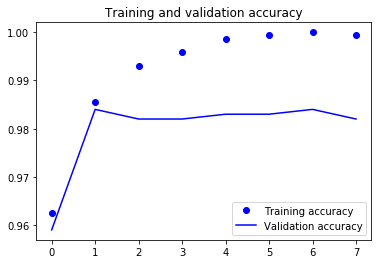

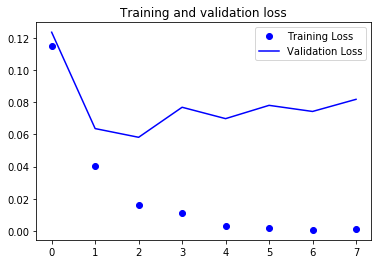

In [18]:
import matplotlib.pyplot as plt
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### **Make predictions on new images**

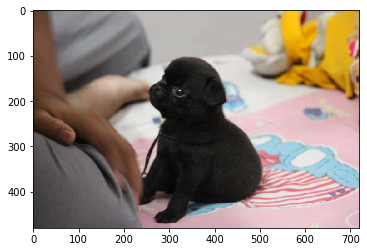

Above image is a dog
--------------------------------------------------------------------------------------


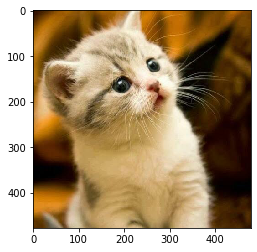

Above image is a cat
-------------------------------------------------------------------------------------


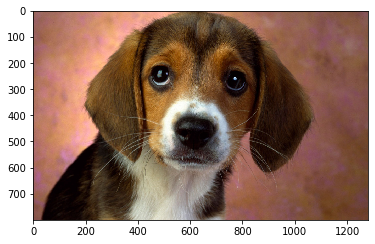

Above image is a dog
--------------------------------------------------------------------------------------


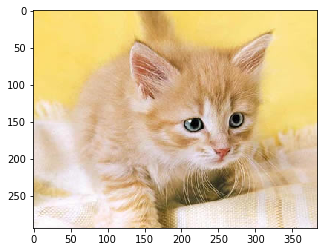

Above image is a cat
-------------------------------------------------------------------------------------


In [19]:
# predicting images
test_path = '/tmp/cats_and_dogs_filtered/test'
for path in os.listdir(test_path):
  path_img = test_path + '/' + path
  if path_img == '/tmp/cats_and_dogs_filtered/test/.ipynb_checkpoints':
    continue
  img = image.load_img(path_img, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = custom_vgg_model.predict(images, batch_size=10)
# print(classes)
# print(classes[0][0])
  pyplot.imshow(imread(path_img))
  pyplot.show()
  if classes[0][0] == 1:
    print("Above image is a cat")
    print('-------------------------------------------------------------------------------------')
  else:
    print("Above image is a dog")
    print('--------------------------------------------------------------------------------------')
  

## **ResNet50**
![ResNet50 architecture](https://user-images.githubusercontent.com/36665975/71542792-aa744f00-2990-11ea-9f35-916d218e5473.png)

[[('n02123045', 'tabby', 0.8728101),
  ('n02123159', 'tiger_cat', 0.053713404),
  ('n02124075', 'Egyptian_cat', 0.029397171),
  ('n02123394', 'Persian_cat', 0.02155546),
  ('n03223299', 'doormat', 0.010325196)]]

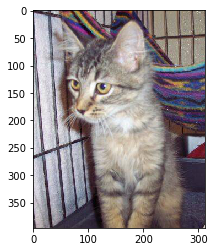

In [27]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
import numpy as np

from matplotlib import pyplot
from matplotlib.image import imread

model = ResNet50(include_top=True, weights='imagenet')
img_path = train_cats_dir + '/cat.2.jpg'

cat = imread(img_path)
pyplot.imshow(cat)

img = image.load_img(img_path,target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
pred = model.predict(x)
decode_predictions(pred)

## **Freezing top layers of ResNet50 and Adjusting last layer for our classification problem**

In [28]:
image_input = Input(shape=(224, 224, 3))

model = ResNet50(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()
last_layer = model.get_layer('avg_pool').output
out = Dense(num_classes, activation='sigmoid', name='output_layer')(last_layer)
custom_resnet_model = Model(inputs=image_input,outputs= out)
custom_resnet_model.summary()

for layer in custom_resnet_model.layers[:-1]:
	layer.trainable = False

custom_resnet_model.layers[-1].trainable

custom_resnet_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

## **Fitting our customized ResNet50 model**

In [29]:
hist = custom_resnet_model.fit(X_train, y_train, batch_size=35, epochs=15, verbose=1, validation_data=(X_test, y_test))
(loss, accuracy) = custom_resnet_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 2000 samples, validate on 1000 samples
Epoch 1/15
2000/2000 [==============================] - 15s 7ms/step - loss: 0.2675 - acc: 0.8955 - val_loss: 0.0909 - val_acc: 0.9730
Epoch 2/15
2000/2000 [==============================] - 7s 4ms/step - loss: 0.1059 - acc: 0.9655 - val_loss: 0.0537 - val_acc: 0.9810
Epoch 3/15
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0769 - acc: 0.9770 - val_loss: 0.0462 - val_acc: 0.9840
Epoch 4/15
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0672 - acc: 0.9805 - val_loss: 0.0336 - val_acc: 0.9870
Epoch 5/15
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0536 - acc: 0.9842 - val_loss: 0.0331 - val_acc: 0.9855
Epoch 6/15
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0552 - acc: 0.9832 - val_loss: 0.0440 - val_acc: 0.9825
Epoch 7/15
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0504 - acc: 0.9800 - val_loss: 0.0355 - val_acc: 0.9870
Epoch 8/15
20

## **Visualizing accuracy and loss**

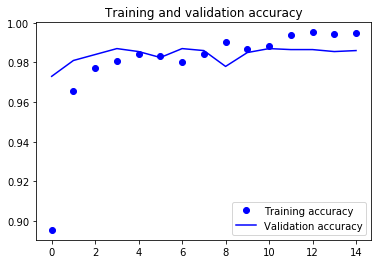

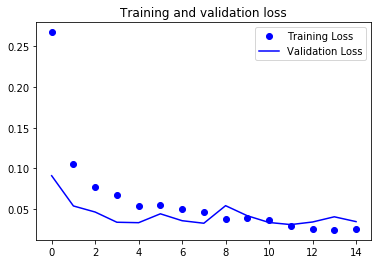

In [30]:
import matplotlib.pyplot as plt
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()